## **Diabetes Prediction**

---

Diabetes prediction using machine learning is a process of leveraging computational models to predict the likelihood of a person developing diabetes based on various health and lifestyle parameters. Diabetes is a chronic condition that affects millions worldwide and early detection can significantly improve outcomes.


Importing the Dependices

In [5]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:

# Define the file path
file_path = 'diabetes.csv'

# Check if running in Google Colab
try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False

if colab_env:
    # For Google Colab: Upload the file
    print("Please upload the 'diabetes.csv' file.")
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]  # Get the uploaded file's name

# Check if file exists (for VS Code or Colab after upload)
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File '{file_path}' not found. Please ensure it is in the correct directory.")

# Load the dataset
diabetes_dataset = pd.read_csv(file_path)




Dataset loaded successfully!
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


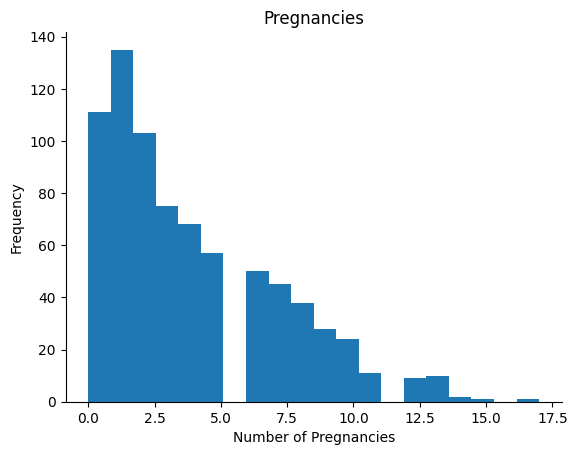

In [11]:
from matplotlib import pyplot as plt

# Ensure 'Pregnancies' exists in the dataset
if 'Pregnancies' in diabetes_dataset.columns:
    diabetes_dataset['Pregnancies'].plot(kind='hist', bins=20)
    plt.title('Pregnancies')
    plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
    plt.xlabel('Number of Pregnancies')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'Pregnancies' column not found in the dataset.")


In [12]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [13]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non Diabetic <br>
1 --> Diabetic

In [15]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
# Separating the data and labels
X = diabetes_dataset.drop(columns ='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

---



In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [24]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

---



In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

---



In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

---



Accuracy Score

In [29]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [31]:
#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

---



In [35]:
# Input data (replace with actual values for prediction)
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for a single instance prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the previously fitted scaler
try:
    standardized_data = scaler.transform(input_data_reshaped)
    print("Standardized Data:", standardized_data)

    # Predict using the classifier
    prediction = classifier.predict(standardized_data)
    print("Prediction:", prediction)

    # Output the result
    if prediction[0] == 0:
        print('The person is not diabetic')
    else:
        print('The person is diabetic')

except Exception as e:
    print(f"An error occurred during prediction: {e}")


Standardized Data: [[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
Prediction: [0]
The person is not diabetic


C:\Users\VARUN RAJ\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Input data (replace with actual values for prediction)
input_data = (5,166,72,19,175,25.8,0.587,51)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for a single instance prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the previously fitted scaler
try:
    standardized_data = scaler.transform(input_data_reshaped)
    print("Standardized Data:", standardized_data)

    # Predict using the classifier
    prediction = classifier.predict(standardized_data)
    print("Prediction:", prediction)

    # Output the result
    if prediction[0] == 0:
        print('The person is not diabetic')
    else:
        print('The person is diabetic')

except Exception as e:
    print(f"An error occurred during prediction: {e}")


Standardized Data: [[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
Prediction: [1]
The person is diabetic


C:\Users\VARUN RAJ\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
